In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms
import numpy as np
from torch.utils.data import Dataset, DataLoader

## 数据读取

In [2]:
# 资产负债表
def Get_Balance_Report(stockCode):
    url = "http://quotes.money.163.com/service/zcfzb_%s.html" % (stockCode)
    return pd.read_csv(url, encoding = 'gb2312')

# 收入组成
def Get_Income_Report(stockCode):
    url = "http://quotes.money.163.com/service/gszl_%s.html" % (stockCode)
    return pd.read_csv(url, encoding = 'gb2312')

# 现金流量表
def Get_Cach_Report(stockCode):
    url = "http://quotes.money.163.com/service/xjllb_%s.html" % (stockCode)
    return pd.read_csv(url, encoding = 'gb2312')

# 利润表
def Get_Profit_Report(stockCode):
    url = "http://quotes.money.163.com/service/lrb_%s.html" % (stockCode)
    return pd.read_csv(url, encoding = 'gb2312')

# 财务报表摘要
def Get_Finance_Report(stockCode):
    url = "http://quotes.money.163.com/service/cwbbzy_%s.html" % (stockCode)
    return pd.read_csv(url, encoding = 'gb2312')

# 财务指标
def Get_Index_Report(stockCode):
    url = "http://quotes.money.163.com/service/zycwzb_%s.html" % (stockCode)
    return pd.read_csv(url, encoding = 'gb2312')

In [3]:
def Get_Daily(stockCode, startDate = '', endDate = ''):
    url = "http://quotes.money.163.com/service/chddata.html?code=%s&start=%s&end=%s" % (stockCode, startDate, endDate)
    return pd.read_csv(url, encoding = 'gb2312', index_col=0)

In [4]:
data = Get_Daily('0000001') 

In [5]:
data.index = list(map(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'), data.index))

In [6]:
data = data[::-1]
data = data[6300:]

In [7]:
data.tail(15)

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值,成交笔数
2020-12-18,'000001,上证指数,3394.8960,3413.8134,3382.7508,3400.4855,3404.8732,-9.9772,-0.293,NaN,280992641,3.54027376853e+11,NaN,NaN,None
2020-12-21,'000001,上证指数,3420.5693,3423.6088,3381.1158,3394.3945,3394.896,25.6733,0.7562,NaN,283759794,3.83898951602e+11,NaN,NaN,None
2020-12-22,'000001,上证指数,3356.7822,3415.7538,3353.8581,3410.9678,3420.5693,-63.7871,-1.8648,NaN,323037654,4.32199556488e+11,NaN,NaN,None
2020-12-23,'000001,上证指数,3382.3195,3394.2089,3360.2019,3362.4721,3356.7822,25.5373,0.7608,NaN,299523527,4.13254779062e+11,NaN,NaN,None
2020-12-24,'000001,上证指数,3363.1133,3394.0746,3354.0215,3382.1930,3382.3195,-19.2062,-0.5678,NaN,275044450,3.63321144328e+11,NaN,NaN,None
2020-12-25,'000001,上证指数,3396.5626,3397.0066,3348.3453,3351.7901,3363.1133,33.4493,0.9946,NaN,294546895,3.59094444683e+11,NaN,NaN,None
2020-12-28,'000001,上证指数,3397.2854,3412.5193,3383.6540,3396.3590,3396.5626,0.7228,0.0213,NaN,316181542,3.98159968833e+11,NaN,NaN,None
2020-12-29,'000001,上证指数,3379.0362,3407.0884,3376.0876,3399.2939,3397.2854,-18.2492,-0.5372,NaN,311769185,3.82102563807e+11,NaN,NaN,None
2020-12-30,'000001,上证指数,3414.4527,3414.4539,3374.4156,3375.0086,3379.0362,35.4165,1.0481,NaN,291023543,3.77542350937e+11,NaN,NaN,None
2020-12-31,'000001,上证指数,3473.0693,3474.9182,3419.7267,3419.7267,3414.4527,58.6166,1.7167,NaN,335673926,4.50482318884e+11,NaN,NaN,None


In [8]:
#data.drop("日期", axis = 1, inplace = True)
data.drop("股票代码", axis = 1, inplace = True)
data.drop("名称", axis = 1, inplace = True)
data.drop("换手率", axis = 1, inplace = True)
data.drop("总市值", axis = 1, inplace = True)
data.drop("流通市值", axis = 1, inplace = True)
data.drop("成交笔数", axis = 1, inplace = True)
data.drop("成交量", axis = 1, inplace = True)

In [9]:
data.tail(15)

,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,成交金额
2020-12-18,3394.8960,3413.8134,3382.7508,3400.4855,3404.8732,-9.9772,-0.293,3.54027376853e+11
2020-12-21,3420.5693,3423.6088,3381.1158,3394.3945,3394.896,25.6733,0.7562,3.83898951602e+11
2020-12-22,3356.7822,3415.7538,3353.8581,3410.9678,3420.5693,-63.7871,-1.8648,4.32199556488e+11
2020-12-23,3382.3195,3394.2089,3360.2019,3362.4721,3356.7822,25.5373,0.7608,4.13254779062e+11
2020-12-24,3363.1133,3394.0746,3354.0215,3382.1930,3382.3195,-19.2062,-0.5678,3.63321144328e+11
2020-12-25,3396.5626,3397.0066,3348.3453,3351.7901,3363.1133,33.4493,0.9946,3.59094444683e+11
2020-12-28,3397.2854,3412.5193,3383.6540,3396.3590,3396.5626,0.7228,0.0213,3.98159968833e+11
2020-12-29,3379.0362,3407.0884,3376.0876,3399.2939,3397.2854,-18.2492,-0.5372,3.82102563807e+11
2020-12-30,3414.4527,3414.4539,3374.4156,3375.0086,3379.0362,35.4165,1.0481,3.77542350937e+11
2020-12-31,3473.0693,3474.9182,3419.7267,3419.7267,3414.4527,58.6166,1.7167,4.50482318884e+11


In [10]:
Past_Days = 10
Predict_Days = 3
# 验证集长度
Val_Len = 200
# 测试集长度
Test_Len = 200

In [11]:
def GenerateData(stock, col):
    curCol = stock[col].copy()
    Col_List = curCol.tolist()
    data = pd.DataFrame()
    
    for i in range(Past_Days):
        data['past%d' % i] = Col_List[i: -Past_Days - Predict_Days + i]
        
    for i in range(Predict_Days):
        data['predict%d' % i] = Col_List[Past_Days + i: - Predict_Days + i]
    
    # 训练集，验证集，测试集
    Train_Data, Val_Data, Test_Data = data[:-(Test_Len + Val_Len)], data[-(Test_Len + Val_Len):-Test_Len], data[-Test_Len:]

    return Train_Data, Val_Data, Test_Data, curCol, stock.index.tolist()

In [12]:
Train_Data, Val_Data, Test_Data, data, data_Index = GenerateData(data, '收盘价')

In [13]:
data

2016-09-20    3022.9995
2016-09-21    3025.8736
2016-09-22    3042.3132
2016-09-23    3033.8956
2016-09-26    2980.4295
                ...    
2021-01-04    3502.9584
2021-01-05    3528.6767
2021-01-06    3550.8767
2021-01-07    3576.2046
2021-01-08    3570.1082
Name: 收盘价, Length: 1048, dtype: float64

/root/miniconda3/envs/myconda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


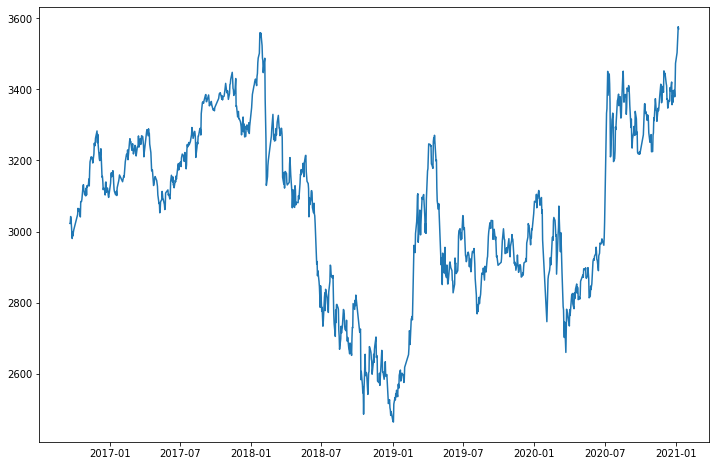

In [14]:
data_List = np.array(data.copy().tolist())
plt.figure(figsize=(12,8))
plt.plot(data_Index, data_List)

In [15]:
# 归一化
Train_Data_numpy = np.array(Train_Data)
Mean = np.mean(Train_Data_numpy)
Std  = np.std(Train_Data_numpy)
Train_Data_tensor = torch.Tensor((Train_Data_numpy - Mean) / Std)

Val_Data_numpy = np.array(Val_Data)
Val_Data_numpy = (Val_Data_numpy - Mean) / Std
Val_Data_tensor = torch.Tensor(Val_Data_numpy)

Test_Data_numpy = np.array(Train_Data)
Test_Data_numpy = (Test_Data_numpy - Mean) / Std
Test_Data_tensor = torch.Tensor(Test_Data_numpy)

In [16]:
class TrainSet(Dataset):
    def __init__(self, data):
        self.data, self.label = data[:, :-Predict_Days].float(), data[:, -Predict_Days:].float()

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.data)

In [17]:
# 创建 dataloader
train_set = TrainSet(Train_Data_tensor)
train_loader = DataLoader(train_set, batch_size=128, shuffle=True)

val_set = TrainSet(Val_Data_tensor)
val_loader = DataLoader(val_set, batch_size=128, shuffle=True)

In [18]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        
        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=128,
            num_layers=1, 
            batch_first=True)
        
        self.out = nn.Sequential(
            nn.Linear(128, 1))
        
    def forward(self, x):
        r_out, (h_n, h_c) = self.lstm(x, None)
        out = self.out(r_out[:, -Predict_Days:, :]) 
        return out

In [19]:

rnn = LSTM()

if torch.cuda.is_available():
    rnn = rnn.cuda()

optimizer = torch.optim.Adam(rnn.parameters(), lr= 0.002)
loss_func = nn.MSELoss()


for step in range(5001):
    for tx, ty in train_loader:
        if torch.cuda.is_available():
            tx = tx.cuda()
            ty = ty.cuda() 
      
        output = rnn(torch.unsqueeze(tx, dim=2))             
        loss = loss_func(torch.squeeze(output), ty)        
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()
    
    for tx, ty in val_loader:
        if torch.cuda.is_available():
            tx = tx.cuda()
            ty = ty.cuda() 
      
        output = rnn(torch.unsqueeze(tx, dim=2))             
        val_loss = loss_func(torch.squeeze(output), ty)        
        
    if step % 1000 == 0:
        print('epoch : %d  ' % step, 'train_loss : %.4f' % loss.cpu().item(), 'val_loss : %.4f' % val_loss.cpu().item())
        

torch.save(rnn, './rnn.pkl')


epoch : 0   train_loss : 0.7553 val_loss : 0.2191
epoch : 1000   train_loss : 0.0030 val_loss : 0.1484
epoch : 2000   train_loss : 0.0002 val_loss : 0.1745
epoch : 3000   train_loss : 0.0001 val_loss : 0.1542
epoch : 4000   train_loss : 0.0000 val_loss : 0.1662
epoch : 5000   train_loss : 0.0000 val_loss : 0.1597


/root/miniconda3/envs/myconda/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/root/miniconda3/envs/myconda/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/root/miniconda3/envs/myconda/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [20]:
rnn = LSTM()
rnn = torch.load('./rnn.pkl')

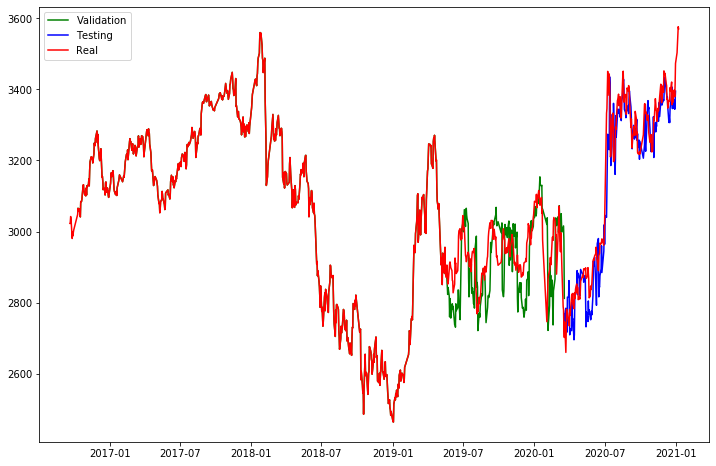

In [21]:
Previous_Data = []
Next_Data = []

Test_Index = len(data_List) - Test_Len

data_List = (data_List - Mean) / Std
data_List = torch.Tensor(data_List)


for i in range(Past_Days, len(data_List) - Predict_Days, Predict_Days):
    x = data_List[i - Past_Days:i]
    x = torch.unsqueeze(torch.unsqueeze(x, dim=0), dim=2)
    
    if torch.cuda.is_available():
        x = x.cuda()
    y = torch.squeeze(rnn(x))
    
    if i < Test_Index:
        Previous_Data.append(torch.squeeze(y.cpu()).detach().numpy() * Std + Mean)
    else:
        Next_Data.append(torch.squeeze(y.cpu()).detach().numpy() * Std + Mean)
        
Previous_Data = np.concatenate(Previous_Data, axis=0)
Next_Data  = np.concatenate(Next_Data, axis=0)



plt.figure(figsize=(12,8))
plt.plot(data_Index[Past_Days: len(Previous_Data) + Past_Days], Previous_Data, 'green', label='Validation')
plt.plot(data_Index[-Test_Len:len(Next_Data) - Test_Len], Next_Data, 'blue', label='Testing')
plt.plot(data_Index, data_List.clone().numpy() * Std + Mean, 'red', label='Real')
plt.legend()
plt.show()

In [22]:
len(Next_Data)

195

In [23]:
len(Previous_Data)

840

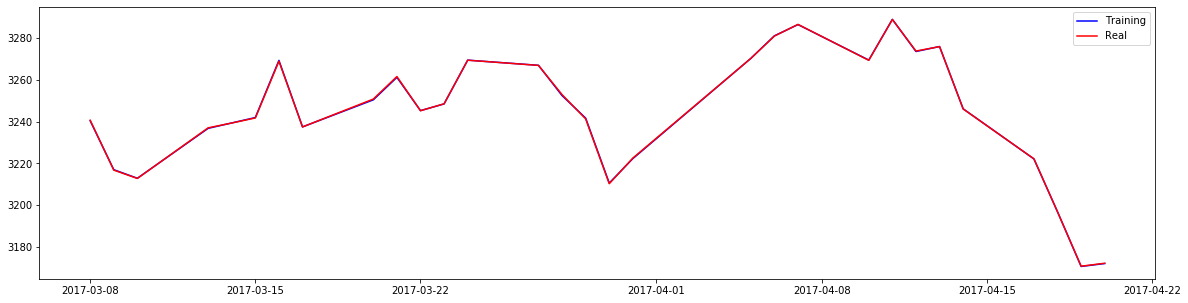

In [24]:
plt.figure(figsize=(20,5))
plt.plot(data_Index[100 + Past_Days: 130 + Past_Days], Previous_Data[100: 130], 'b', label='Training')
plt.plot(data_Index[100 + Past_Days: 130 + Past_Days], (data_List.clone().numpy()* Std + Mean)[100 + Past_Days: 130 + Past_Days], 'r', label='Real')
plt.legend()
plt.show()

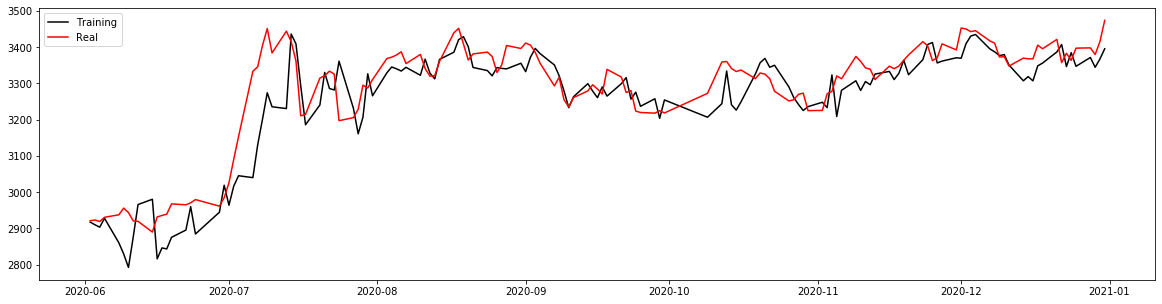

In [27]:
plt.figure(figsize=(20,5))
plt.plot(data_Index[-Test_Len + 50: -Test_Len + 195], Next_Data[50:195], 'k', label='Training')
plt.plot(data_Index[-Test_Len + 50: -Test_Len + 195], (data_List.clone().numpy()* Std + Mean)[-Test_Len + 50: -Test_Len + 195], 'r', label='Real')
plt.legend()

plt.show()

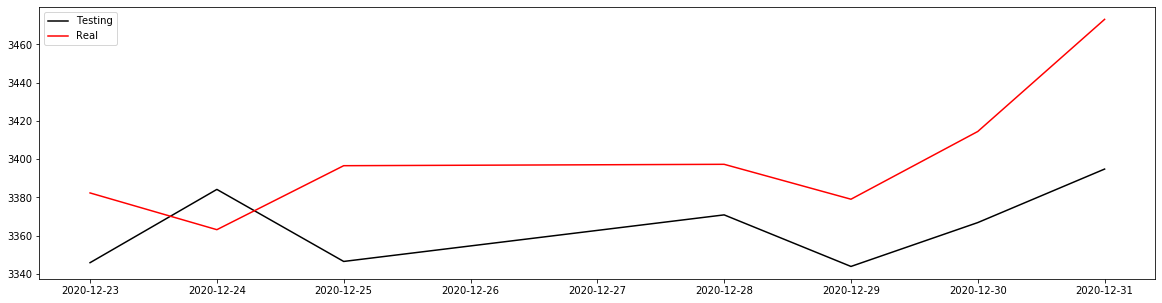

In [28]:
plt.figure(figsize=(20,5))
plt.plot(data_Index[-Test_Len + 188: -Test_Len + 195], Next_Data[188:195], 'k', label='Testing')
plt.plot(data_Index[-Test_Len + 188: -Test_Len + 195], (data_List.clone().numpy()* Std + Mean)[-Test_Len + 188: -Test_Len + 195], 'r', label='Real')
plt.legend()

plt.show()